# 분류

머신러닝의 학습 방법은 크게 지도 학습(supervised learning)과 비지도 학습(unsupervised learning)으로 나눌 수 있다. 
- 지도 학습 : 라벨링이 된 데이터를 학습시키는 것을 의미
- 비지도 학습 : 라벨링이 되지 않은 데이터를 학습시키는 것을 의미

(여기서 라벨링이란 학습시킬 데이터(train data)에 각각에 맞추고 싶은 정답(target data)이 표시된 것을 의미한다.)

지도학습은 target data의 형태에 따라 분류(classification)와 회귀(regression)로 나눌 수 있다.
- 분류 : target data가 categorical/discrete 형태인 경우, 데이터가 속한 그룹을 찾아내는 것을 의미
- 회귀 : target data가 continuous 형태인 경우, feature variable과 target variable의 관계를 찾아내는 것을 의미

<img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbblCkC%2FbtqEq8rEkUa%2FLM1DLkUgBku9ApbkTYX90K%2Fimg.png' width='600' height='300'/>

# KNN Classifier

k-NN(k-Nearest Neighbors) 알고리즘은 가장 간단한 분류 머신러닝 알고리즘이다. 

1) 임의의 k를 정해, 
2) 예측할 데이터를 기준으로 가장 가까운 k개의 요소(이웃)의 분류 클래스를 기준으로,
3) 더 많은 이웃이 있는 클래스로 분류한다. 

### 예제

k-NN classifier를 scikit-learn에 있는 붗꽃 종류 데이터를 활용해 서술했다. 우선 dataset에서 DataFrame을 활용해 구조를 파악하고, feature, target variable을 설정한다.

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

dataset = load_iris()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target

x_data = dataset.data
y_data = dataset.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

train data와 test data를 8:2 비율로 분할한다.

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)
# x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, stratify = y_data)

`KNeighborsClassifier`을 활용해 k-NN classifier 모델을 만들고 학습시킨다. (여기서 확인하는 주변 이웃의 숫자를 5로 지정한다.)

In [4]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

y_test_pred = knn.predict(x_test)
print(y_test)
print(y_test_pred)

[0 1 2 0 2 0 2 2 0 1 2 2 0 2 0 2 2 0 2 2 0 1 0 1 2 1 0 0 0 2]
[0 2 2 0 1 0 2 2 0 1 2 2 0 2 0 2 1 0 2 2 0 1 0 1 2 1 0 0 0 2]


### 평가점수

클래스가 0과 1 두 종류 밖에 없는 이진 분류의 경우에 일반적으로 클래스 이름을 양성(Positive)와 음성(Negative)로 나눈다. 이 때 결과를 나타내는 이진 분류결과표(Binary Confusion Matrix) 결과표는 다음과 같다.

|  | 양성이라고 예측 | 음성이라고 예측 |
| --- | --- | --- |
| 실제 양성 | 양성 예측이 맞음 (True Positive) | 음성 예측이 틀림 (False Negative) |
| 실제 음성 | 양성 예측이 틀림 (False Positive) | 음성 예측이 맞음 (True Negative) |

위를 토대로 분류의 결과를 다양한 척도로 평가점수를 사용한다.

- 정확도(accuracy) : 전체 샘플 중 맞게 예측한 샘플 수의 비율

$$\mathrm{accuracy} = \frac{TP+TN}{TP+TN+FP+FN}$$

- 정밀도(precision) : 양성 클래스에 속한다고 출력한 샘플 중 실제로 양성 클래스에 속하는 샘플 수 의 비율

$$\mathrm{precision} = \frac{TP}{TP+FP}$$

- 재현율(recall) : 실제 양성 클래스에 속한 표본 중에 양성 클래스에 속한다고 출력한 표본의 수의 비율

$$\mathrm{recall} = \frac{TP}{TP+FN}$$

- 위양성율(fall-out) : 실제 양성 클래스에 속하지 않는 표본 중에 양성 클래스에 속한다고 출력한 표본의 비율

$$\mathrm{fallout} = \frac{FP}{FP+TN}$$

- F-score : 정밀도와 재현율의 가중조화평균을 F-score라고 한다. 정밀도에 주어지는 가중치를 베타라고 한다.

$$F_{\beta} = (1+\beta^{2})(\mathrm{precision} \cdot \mathrm{recall})/(\beta^{2} \, \mathrm{precision} + \mathrm{recall})$$

베타가 1인 경우 특별히 F1-score라고도 부른다.

$$F_{1} = (2 \, \cdot \mathrm{precision} \cdot \mathrm{recall})/( \mathrm{precision} + \mathrm{recall})$$

scikit-learn의 metrics 패키지에서 정밀도, 재현율, F1-score를 구하는 `classification_report`가 있다. 또 정확도, 정밀도, 재현율을 각각 `accuracy_score`, `precision_score`, `recall_score`로 구할 수 있다.

In [5]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.67      0.80      0.73         5
           2       0.92      0.85      0.88        13

    accuracy                           0.90        30
   macro avg       0.86      0.88      0.87        30
weighted avg       0.91      0.90      0.90        30



### ROC Curve, AUC

재현율과 위양성률은 일반적으로 양의 상관 관계가 있다. 재현율을 높이기 위해서는 양성으로 판단하는 기준을 낮추면 되는데, 이렇게 되면 음성임에도 양성으로 판단되는 표본 데이터가 같이 증가해 위양성율이 동시에 증가한다.

ROC(Receiver Operator Characteristic) 커브는 클래스 판별 기준값의 변화에 따른 위양성률과 재현율의 변화를 시각화한 것이다. scikit-learn에서는 `roc_curve`를 활용하면 구할 수 있다.

AUC(Area Under the Curve)는 ROC curve의 면적을 의미한다. 위양성률 값이 같을 때 재현률 값이 크거나 재현률 값이 같을 때 위양성률 값이 작을수록 AUC가 1에 가까운 값이고 좋은 모형이다. scikit-learn에서는 `auc`, `roc_auc_score` 를 활용하면 구할 수 있다.

우선 `label_binarize`를 사용하여 클래스별로 이진화를 한다.

In [6]:
from sklearn.preprocessing import label_binarize

labels = [0, 1, 2]
y_test = label_binarize(y_test, classes=labels)
y_test_pred = label_binarize(y_test_pred, classes=labels)

print(y_test.shape, y_test_pred.shape)

(30, 3) (30, 3)


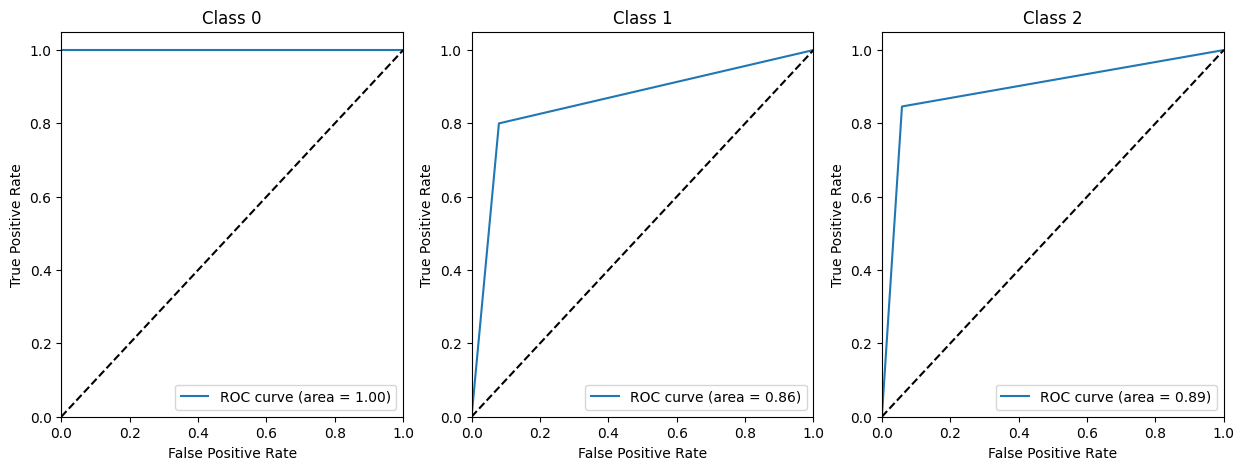

0.9178883861236803


In [7]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

n_classes = 3
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_test_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(15, 5))
for idx, i in enumerate(range(n_classes)):
    plt.subplot(1, 3, 1+idx)
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Class %0.0f' % idx)
    plt.legend(loc="lower right")
plt.show()

print(roc_auc_score(y_test, y_test_pred, multi_class='raise'))

# SVM

### 라그랑주 승수

라그랑주 승수법은 최적화 문제에서 사용되는 수학적 기법으로써 최대 또는 최소값을 찾으려는 문제에서 해결방법으로 사용된다. 라그랑주 승수법을 사용하는 방법은 목적 함수 $f(x,y)$와 제약 조건 $g(x,y)=0$에 대해 새로운 변수 $\lambda$를 이용하여 다음의 보조 방정식을 만든 다음, 보조방정식에 대해 모든 변수에 대한 편미분 값이 0이되는 변수의 해를 찾는 것이다.

$$L(x,y,\lambda)=f(x,y)-\lambda g(x,y)$$

이렇게 목적 함수와 제약 조건에 대해 위와 같은 보조 방정식을 만들고 문제를 풀 수 있게 되는 이유는 제약 조건을 만족시키면서 목적 함수를 최대화 또는 최소화 시키는 점에서는 목적함수의 gradient(쉽게 말해 기울기)와 제약 조건의 gradient가 평행하기 때문이다.

아래 그림에서 $d_{1}$이 최대값이라고 가정할 때, $g(x, y)=c$라는 제약 조건이 붙었다고 하자. 자세히 보면 $f(x, y)$와 $g(x, y)=c$가 접점을 이루는 곳이(미분했을 때의 기울기가 같아지는 곳이) 제한된 조건을 만족하는 $f(x, y)$의 최대값이다.

<img src='
https://raw.githubusercontent.com/angeloyeo/angeloyeo.github.io/master/pics/2020-09-30-SVM/pic3.png' width='400' height='300'/>

### Decision Rule

Decision rule이란 새로운 입력 $\vec{u}$에 대해서 이 입력의 class가 +인지 -인지 결정하는 방법에 대한 것이다. 다음과 같이 2차원 공간 위에 decision boundary와 법선 벡터 $\vec{u}$가 있다고 하자.

<img src='
https://raw.githubusercontent.com/angeloyeo/angeloyeo.github.io/master/pics/2020-09-30-SVM/pic4.png' width='400' height='300'/>

아직 $\vec{w}$가 무엇인지는 모르지만 우리가 설정하려고 하는 것은 가운데 dashed line보다 위에 있으면 +로, 아래에 있으면 -로 classify하려는 것이다. 즉, 우리는 decision rule을 다음과 같이 설정할 수 있다.

$$\vec{w}\cdot\vec{u}\geq c$$

이 때 c는 임의의 상수다. 즉, 아직 $\vec{w}$와 c가 정해진 값은 아니지만 이 조건을 만족하면 +라고 정하자는 decision rule을 지정할 수 있는 것이
다. 이 식을 약간 변형시키면,

$$\vec{w}\cdot\vec{u}+b\geq 0$$

으로 변형시킬 수 있다.

### street 생성에 대한 조건

두 가지의 클래스로 샘플들이 구별되어 있다고 하자. 하나는 positive samples($x_{+}$), 나머지 하나는 negative samples($x_{-}$)이다.

아래 그림에서 우선 실선으로 표시된 두 개의 선 위에 positive samples와 negative samples가 걸쳐있다는 것을 알 수 있다. 또, 실선들 사이에 있는 dashed line으로부터 실선까지의 거리는 같게 설정했다.

따라서 우리는 위의 식부터 $\vec{w}\cdot\vec{u}+b\geq 0$ 0이 기준이 아니라 dashed line을 기준으로 $\delta$를 만큼 떨어져있다고 확장해서 생각해도 될 것이다.

$$\vec{w}\cdot\vec{x}_{+}+b\geq \delta$$

$$\vec{w}\cdot\vec{x}_{-}+b\leq -\delta$$

여기서 우리는 $\delta$를 정규화하여 1로 생각해도 되고, 위의 두 식을 합치면 다음과 같이 표현할 수 있다.

$$y_{i}(\vec{w}\cdot\vec{x}_{i}+b)-1\geq 0$$

<img src='
https://raw.githubusercontent.com/angeloyeo/angeloyeo.github.io/master/pics/2020-09-30-SVM/pic4.png' width='400' height='300'/>

### street의 너비와 최적화 문제 설정

아래 그림에서 실선 위에 있는 $x_{+}$와 $x_{-}$에 대한 원점으로부터의 벡터 $\vec{x_{+}}$와 $\vec{x_{-}}$에 대하여, $\vec{x_{+}}-\vec{x_{-}}$로 생각해보자. 이것을 이용해 두 실선의 거리를 생각할 수 있는데, $\vec{w}$는 dashed line에 수직하기 때문에 $\vec{w}$와 방향은 같고 크기는 1인 벡터를 이용하면 두 실선 사이의 거리를 다음과 같이 표현할 수 있다.

$$\frac{\vec{w}}{|\vec{w}|}\cdot(\vec{x_{+}}-\vec{x_{-}})$$

<img src='
https://raw.githubusercontent.com/angeloyeo/angeloyeo.github.io/master/pics/2020-09-30-SVM/pic5.png
' width='400' height='300'/>

이 때 식을 간편하게 생각하기 위해 $y_{i}=\pm 1$이라고 생각해보자. 이를 통해 우리는 $\vec{w}\cdot\vec{x}_{i} = 1-b$ 와 $\vec{w}\cdot\vec{x}_{i} = -1-b$이라는 식을 얻을 수 있다. 이 식들을 위의 식에 다시 대입하면, 다음과 같은 결과를 얻게 된다.

$$\begin{matrix}\frac{\vec{w}}{|\vec{w}|}\cdot(\vec{x_{+}}-\vec{x_{-}}) \\ \\ = \frac{1}{|\vec{w}|}\cdot(\vec{w}\cdot \vec{x_{+}}-\vec{w}\cdot \vec{x_{-}}) \\ \\ = \frac{1}{|\vec{w}|}\cdot(1-b+1+b)= \frac{2}{|\vec{w}|} \end{matrix}$$

즉, 두 실선 사이의 거리는 $\frac{2}{|\vec{w}|}$이므로, 우리의 목표는 이 거리를 최대화하는 것이다. 즉 우리의 목표를 다음과 같이 표현할 수 있다.

$$ \min\frac{1}{2}|\vec{w}|$$

### 최적화 계산

따라서 우리는 다음의 $\frac{1}{2} |\vec{w}|^{2}$ 목적함수를 다음의 $y_{i}(\vec{w}\cdot\vec{x}_{i}+b)-1 = 0$ 조건에서 최적화하면 된다. 따라서 라그랑주 승수법을 활용해 최적화를 진행해보도록 하겠다.

$$L=\frac{1}{2} |\vec{w}|^{2} - \sum_{i=1}^{n} \lambda_{i} \, [y_{i}(\vec{w}\cdot\vec{x}_{i}+b)-1] = 0$$

$$\frac{\partial L}{\partial w} = \vec{w} - \sum_{i=1}^{n} \lambda_{i} \, y_{i} \, \vec{x}_{i}=0$$

$$\frac{\partial L}{\partial b} = \sum_{i=1}^{n} \lambda_{i} \, y_{i} = 0$$

여기서 잠정적인 결론으로는 $\vec{w} = \sum_{i=1}^{n} \lambda_{i} y_{i}\vec{x}_{i}$와, $\sum_{i=1}^{n} \lambda_{i} y_{i} = 0$을 도출할 수 있다. 이를 위의 라그랑주 방정식에 대입하도록 하겠다.

$$\begin{matrix} L=\frac{1}{2} |\vec{w}|^{2} - \sum\limits_{i=1}^{n} [\lambda_{i} \, y_{i} \, \vec{w} \cdot \vec{x}_{i}-\lambda_{i} \, y_{i}\, b-\lambda_{i}] \\ \\ =\frac{1}{2} |\vec{w}|^{2} - \sum\limits_{i=1}^{n}\sum\limits_{j=1}^{n}\lambda_{i}\, \lambda_{j}  \, y_{i}\, y_{j} \, \vec{x}_{i}^{T} \, \vec{x}_{j}+ \sum\limits_{i=1}^{n}\lambda_{i} \\ \\ = \frac{1}{2}|\vec{w}|^{2} - |\vec{w}|^{2} + \sum\limits_{i=1}^{n}\lambda_{i} \\ \\ = \sum\limits_{i=1}^{n}\lambda_{i} - \frac{1}{2}|\vec{w}|^{2}\end{matrix}$$

여기서 $ |\vec{w}|^{2} = \sum\limits_{i=1}^{n} \sum\limits_{j=1}^{n} \lambda_{i} \, \lambda_{j} \, y_{i} \, y_{j} \, \vec{x}_{i}^{T} \, \vec{x}_{j}$ 를 다시 대입하면 다음과 같이 풀어서 사용할 수 있다.

$$ L=\sum\limits_{i=1}^{n}\lambda_{i} - \frac{1}{2} \sum\limits_{i=1}^{n} \sum\limits_{j=1}^{n} \lambda_{i} \, \lambda_{j} \, y_{i} \, y_{j} \, \vec{x}_{i}^{T} \, \vec{x}_{j}$$

위를 듀얼 형식이라고 부르기도 한다. 이를 통해서 $X=\mathbb{R}^{d}$(d차원)의 형태를 데이터의 feature의 개수(n개)로 줄여 보다 간략하게 표현할 수 있는 장점이 있다.

### Kernel Tricks

위에서 라그랑주 함수를 통해서 L의 최대값은 $\vec{x}_{i} \cdot \vec{x}_{j}$으로 결정된다. 따라서 $\vec{x}_{i} \cdot \vec{x}_{j}$를 적절하게 잘 변형시킨다면 L의 최대값을 더 끌어올려줄 수 있다. 이것을 하는 방법은 $\vec{x}_{i}$, $\vec{x}_{j}$ 각각을 혹은 $\vec{x}_{i} \cdot \vec{x}_{j}$를 통째로 적절하게 변형시켜주는 것이다. 적절한 $\phi(\cdot)$을 찾아 $\phi(\vec{x}_{i}) \cdot \phi(\vec{x}_{j})$과 같이 변형시켜주면 된다. 기하학적으로 표현하면 다음과 같이 쉽게 설명가능하다.

<img src='
https://raw.githubusercontent.com/angeloyeo/angeloyeo.github.io/master/pics/2020-09-30-SVM/pic6.png
' width='600' height='300'/>

왼쪽 평면에 있는 sample들이 오른쪽과 같이 변형되는데, 이것은 sample들이 있는 sample 공간을 kernel 함수를 이용해 공간을 3차원 공간으로 변형시켜주었기 때문이다. 그런 다음 3차원 공간에서 hyperplane을 이용하면 샘플들을 더 쉽게 구별할 수 있다.

### 예제

붓꽃 문제를 서포트 벡터 머신으로 풀어보자. 다음과 같은 데이터만 사용한 이진 분류 문제로 바꾸어 풀어본다. 위의 예제와 마찬가지로 커널 인수 `kernel`과 슬랙변수 가중치 인수 `C`는 각각 `linear`, `1e10`으로 한다. (특징 변수를 꽃받침의 길이와 폭만 사용한다. 붓꽃 종을 Setosa와 Versicolour만 대상으로 한다.)

In [8]:
from sklearn.datasets import load_iris
iris = load_iris()
X1 = iris.data[:100, :2]
y1 = iris.target[:100]

from sklearn.svm import SVC
svm = SVC(kernel="linear", C=1e10).fit(X1, y1)

from sklearn.metrics import classification_report
print(classification_report(y1, svm.predict(X1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



# 군집

머신러닝의 학습 방법은 크게 지도 학습(supervised learning)과 비지도 학습(unsupervised learning)으로 나눌 수 있다. 
- 지도 학습 : 라벨링이 된 데이터를 학습시키는 것을 의미
- 비지도 학습 : 라벨링이 되지 않은 데이터를 학습시키는 것을 의미

(여기서 라벨링이란 train data에 정답이 표시된것을 의미한다.)

비지도학습의 가장 대표적인 학습 방법으로는 군집이 있다. 군집(clustering)은 비슷한 샘플 데이터끼리 그룹으로 모으는 작업을 의미하며, 군집 알고리즘을 통해 만들어진 그룹을 클러스터(cluster)라고 부른다. 군집의 가장 대표적인 알고리즘으로는 K-means와 PCA가 있다.

<img src='https://gaussian37.github.io/assets/img/ml/concept/k-means/unsupervised-learning.PNG' width='600' height='320'/>

# K-means

### 알고리즘

K-means 알고리즘의 원리는 다음과 같다.

1. training sample에서 우리가 cluster의 개수만큼 클러스터 중심(cluster center)/센트로이드(centroid)를 임의로 지정한다. (Random하게 K개의 센트로이드를 초기화한다.)

$$\mu_{1}, \mu_{2}, \cdots, \mu_{k} \in \mathbb{R}^{n}$$

2. 모든 training sample에 대해서 가장 가까운 센트로이드의 cluster로 할당한다. (cluster assignment step)

$$\min_{k}||x^{(i)}-\mu_{k}||^{2}$$

3. 각 cluster에 해당하는 모든 점들의 평균을 구하고, 그 평균으로 센트로이드를 옮긴다(갱신한다). (move centroid step)

$$\mu_{k}=\frac{1}{m}(x^{1}, \cdots, x^{i}, \cdots, x^{m})$$

4. 2번과 3번을 계속해서 반복하면, 센트로이드가 더 이상 움직이지 않고 수렴하는 지점에서 cluster가 결정된다.

- $\mu_{k}$ : cluster k의 centriod 위치
- $k$ : cluster의 개수
- $\{x^{i}\}$ : 각 cluster에 있는 training set
- $m$ : 각 cluster에 있는 training set의 개수

<p float="left">
    <img src="https://gaussian37.github.io/assets/img/ml/concept/k-means/2.PNG" width="200" height='180'/>
    <img src="https://gaussian37.github.io/assets/img/ml/concept/k-means/3.PNG" width="200" height='180'/>
    <img src="https://gaussian37.github.io/assets/img/ml/concept/k-means/6.PNG" width="200" height='180'/>
</p>

### 최적화

K-means 알고리즘을 최적화하는 방법은 다음과 같다. 아래는 K-means 알고리즘의 비용함수다.(Distortion function이라고 부르기도 한다.)

$$J(c^{(1)}, \cdots, c^{(m)}, \mu^{(1)}, \cdots, \mu^{(k)})=\frac{1}{m}\sum^{m}_{i=1}||x^{(i)}-\mu_{c^{(i)}}||^{2}$$

$$ \min_{c, \, \mu} J(c^{(1)}, \cdots, c^{(m)}, \mu^{(1)}, \cdots, \mu^{(k)})$$

- $c^{(i)}$ : 각각의 training set($x^{i}$)이 할당되어 있는 cluster의 인덱스
- $\mu_{k}$ : cluster k의 centriod 위치
- $\mu_{c^{(i)}}$ : cluster의 인덱스($c^{(i)}$)의 centriod 위치

우리의 최종 목적은 비용함수 J를 최소화하는 c와 $\mu$를 찾는 것이다.

+ 추가적으로 random initialization을 통해 여러번 시행시켜 local optima에 도달하지 않고 가장 좋은 모델을 선택하는 것이 바람직하다.

### + K의 값 정하기

cluster의 개수인 k를 결정하는 것은 일반적으로 데이터를 직접 확인하거나 다른 clustering algorithm의 결과를 보고 선택할 수 있다. 그 중에서 Elbow Method가 있다. 이 방법은 k의 개수를 1에서 점차 늘려가면서 비용함수(Distortion function)을 계산한다. x축을 k(cluster의 개수), y축을 비용함수로 설정하고 그래프를 그려보면, 특정 k 이후의 비용이 거의 변하지 않는 지점이 있다. 우리는 그곳을 elbow point라고 일컫고, 보통 해당 k를 선택하게 된다.

<img src='https://gaussian37.github.io/assets/img/ml/concept/k-means/15.PNG
' width='600' height='320'/>

### 예제

KMeans 알고리즘를 scikit-learn에 있는 붗꽃 종류 데이터를 활용해 서술했다. 우선 dataset에서 DataFrame을 활용해 구조를 파악하고, feature, target variable을 설정한다.

In [9]:
from sklearn.datasets import load_iris
iris = load_iris()
x_data = iris.data[:, :2] #use only 'sepal length and sepal width' # 'sepal length (cm)''sepal width (cm)'
y_data = iris.target

In [10]:
import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [12]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(x_data)

KMeans(n_clusters=3, random_state=42)

In [13]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [14]:
import numpy as np
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([50, 47, 53]))

`.transform` 메소드는 훈련 데이터 샘플에서 클러스터 중심까지 거리로 변환해준다.

In [15]:
km.transform(x_data)

array([[0.11840608, 1.76483558, 1.05159358],
       [0.44093083, 1.91421501, 0.9261403 ],
       [0.38160189, 2.11649197, 1.18751365],
       [0.52193869, 2.21291325, 1.24233499],
       [0.17210462, 1.88740674, 1.19250806],
       [0.61483331, 1.6362795 , 1.26401576],
       [0.40696437, 2.23658316, 1.37037386],
       [0.02863564, 1.84176313, 1.04835901],
       [0.80375369, 2.41906566, 1.38917649],
       [0.34470277, 1.91293635, 0.96397369],
       [0.47876926, 1.54505593, 1.07457758],
       [0.2078942 , 2.03892075, 1.20353254],
       [0.47499474, 2.01414307, 1.02100579],
       [0.82560281, 2.51386918, 1.50533642],
       [0.9785806 , 1.37197092, 1.30781396],
       [1.19432826, 1.73068857, 1.70913197],
       [0.61483331, 1.6362795 , 1.26401576],
       [0.11840608, 1.76483558, 1.05159358],
       [0.78741349, 1.32839928, 1.10998895],
       [0.38369259, 1.86009779, 1.2962937 ],
       [0.39499367, 1.44978574, 0.80011792],
       [0.28778464, 1.82341915, 1.21196862],
       [0.

`.predict` 메소드는 가장 가까운 centriod의 cluster로 출력한다.

In [16]:
y_predict = km.predict(x_data)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

KMeans는 반복적으로 클러스터 중심을 옮기면서 최적의 클러스터를 찾는데, `n_iter_` 메소드는 이 알고리즘이 반복한 횟수를 출력한다.

In [17]:
print(km.n_iter_)

4


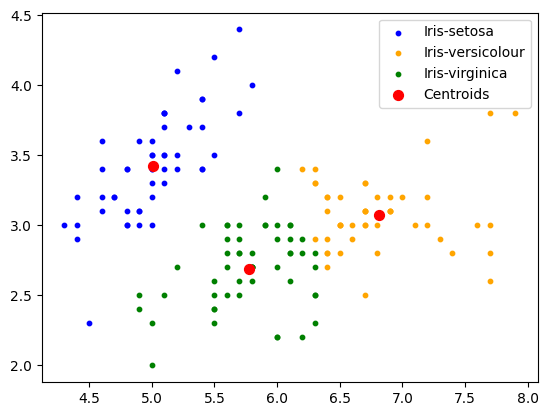

In [18]:
#Visualising the clusters
plt.scatter(x_data[y_predict == 0, 0], x_data[y_predict == 0, 1], s = 10, c = 'blue', label = 'Iris-setosa')
plt.scatter(x_data[y_predict == 1, 0], x_data[y_predict == 1, 1], s = 10, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x_data[y_predict == 2, 0], x_data[y_predict == 2, 1], s = 10, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s = 50, c = 'red', label = 'Centroids')

plt.legend()

최적의 k를 찾는 Elbow method를 진행해보겠다. centriod와 샘플 사이의 거리의 제곱 합을 inertia라고 부르는데, inertia는 클러스터에 속한 샘플이 얼마나 가깝게 모여있는지를 나타낸다고 생각하면 된다. 일반적으로 클러스터 개수가 늘어나면 inertia도 줄어든다. KMeans에는 `inertia_` 메소드를 통해 Elbow method를 실행할 수 있다.

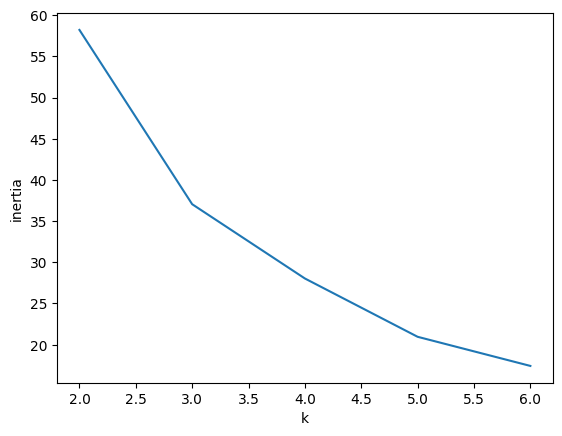

In [19]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(x_data)
    inertia.append(km.inertia_)
plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()